# requirements

In [4]:
# module reloading script, fetches updates to ml4fmri package
import sys, importlib
from pathlib import Path

PKG = "ml4fmri"
# adjust as needed; this assumes your repo root is the CWD and sources are in ../src
SRC = Path().joinpath("../src").resolve()

def _ensure_src_on_path():
    p = str(SRC)
    if p not in sys.path:
        sys.path.insert(0, p)

def fresh_import_ml4fmri():
    """
    Remove any cached ml4fmri modules and import from SRC.
    Returns the ml4fmri module and (if available) meanMLP class.
    """
    _ensure_src_on_path()

    # purge previous imports so code changes take effect
    to_delete = [k for k in list(sys.modules) if k == PKG or k.startswith(PKG + ".")]
    for k in to_delete:
        del sys.modules[k]

    importlib.invalidate_caches()

    ml4fmri = __import__(PKG)
    meanMLP = None
    try:
        from ml4fmri.models import meanMLP 
    except Exception as e:
        print("Note: could not import meanMLP yet:", e)

    try:
        import inspect
        print("ml4fmri imported from:", Path(inspect.getfile(ml4fmri)).parent)
    except Exception:
        pass
    print("ml4fmri ready")
    return ml4fmri

# --- first import (or manual reload later) ---
ml4fmri = fresh_import_ml4fmri()

# get sample data for experiments
from abide import load_data as load_abide
from cobre import load_data as load_cobre

data, labels = load_abide()
data.shape, labels.shape

# data, labels = data[:100], labels[:100]

ml4fmri imported from: /Users/ppopov1/meanMLP/src/ml4fmri
ml4fmri ready


((569, 140, 53), (569,))

# test cvbench

cvbench INFO: Running models: ['LR', 'meanMLP', 'MILC', 'Transformer', 'meanTransformer', 'BNT', 'BrainNetCNN', 'LSTM', 'meanLSTM']
cvbench INFO: Using device: mps
cvbench INFO: Training model: LR
cvbench.LR INFO: Fold 01/10: Train/Val/Test AUC 1.000/1.000/0.737: Time elapsed 0.12 s


ml4fmri imported from: /Users/ppopov1/meanMLP/src/ml4fmri
ml4fmri ready


cvbench.LR INFO: Fold 02/10: Train/Val/Test AUC 1.000/1.000/0.692: Time elapsed 0.11 s
cvbench.LR INFO: Fold 03/10: Train/Val/Test AUC 1.000/1.000/0.671: Time elapsed 0.11 s
cvbench.LR INFO: Fold 04/10: Train/Val/Test AUC 1.000/1.000/0.681: Time elapsed 0.11 s
cvbench.LR INFO: Fold 05/10: Train/Val/Test AUC 1.000/1.000/0.742: Time elapsed 0.11 s
cvbench.LR INFO: Fold 06/10: Train/Val/Test AUC 1.000/1.000/0.751: Time elapsed 0.11 s
cvbench.LR INFO: Fold 07/10: Train/Val/Test AUC 1.000/1.000/0.646: Time elapsed 0.10 s
cvbench.LR INFO: Fold 08/10: Train/Val/Test AUC 1.000/1.000/0.715: Time elapsed 0.11 s
cvbench.LR INFO: Fold 09/10: Train/Val/Test AUC 1.000/1.000/0.776: Time elapsed 0.10 s
cvbench.LR INFO: Fold 10/10: Train/Val/Test AUC 1.000/1.000/0.812: Time elapsed 0.11 s
cvbench INFO: Training model: meanMLP
cvbench.meanMLP INFO: Fold 01/10: Train/Val/Test AUC 0.982/0.720/0.847: Time elapsed 2.98 s
cvbench.meanMLP INFO: Fold 02/10: Train/Val/Test AUC 0.937/0.738/0.643: Time elapsed 2.

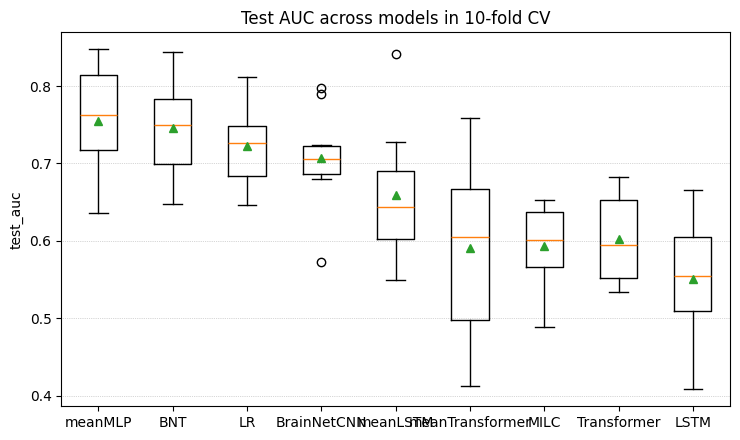

In [7]:
ml4fmri = fresh_import_ml4fmri()
from ml4fmri import cvbench # runs CV experiments with implemented models on the given data
report = cvbench(data, labels, n_folds=10)
report.plot_scores()

In [8]:
train_df = report.get_train_dataframe()
test_df = report.get_test_dataframe()
meta = report.meta

In [10]:
import json

train_path = "cvbench_train.csv"
test_path = "cvbench_test.csv"
meta_path = "cvbench_meta.json"

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)
with open(meta_path, "w") as f:
    json.dump(meta, f)

In [ ]:
import pandas as pd
import json

# Load the train and test dataframes
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Load the meta data
with open(meta_path, "r") as f:
    meta = json.load(f)


ml4fmri imported from: /Users/ppopov1/meanMLP/src/ml4fmri
ml4fmri ready


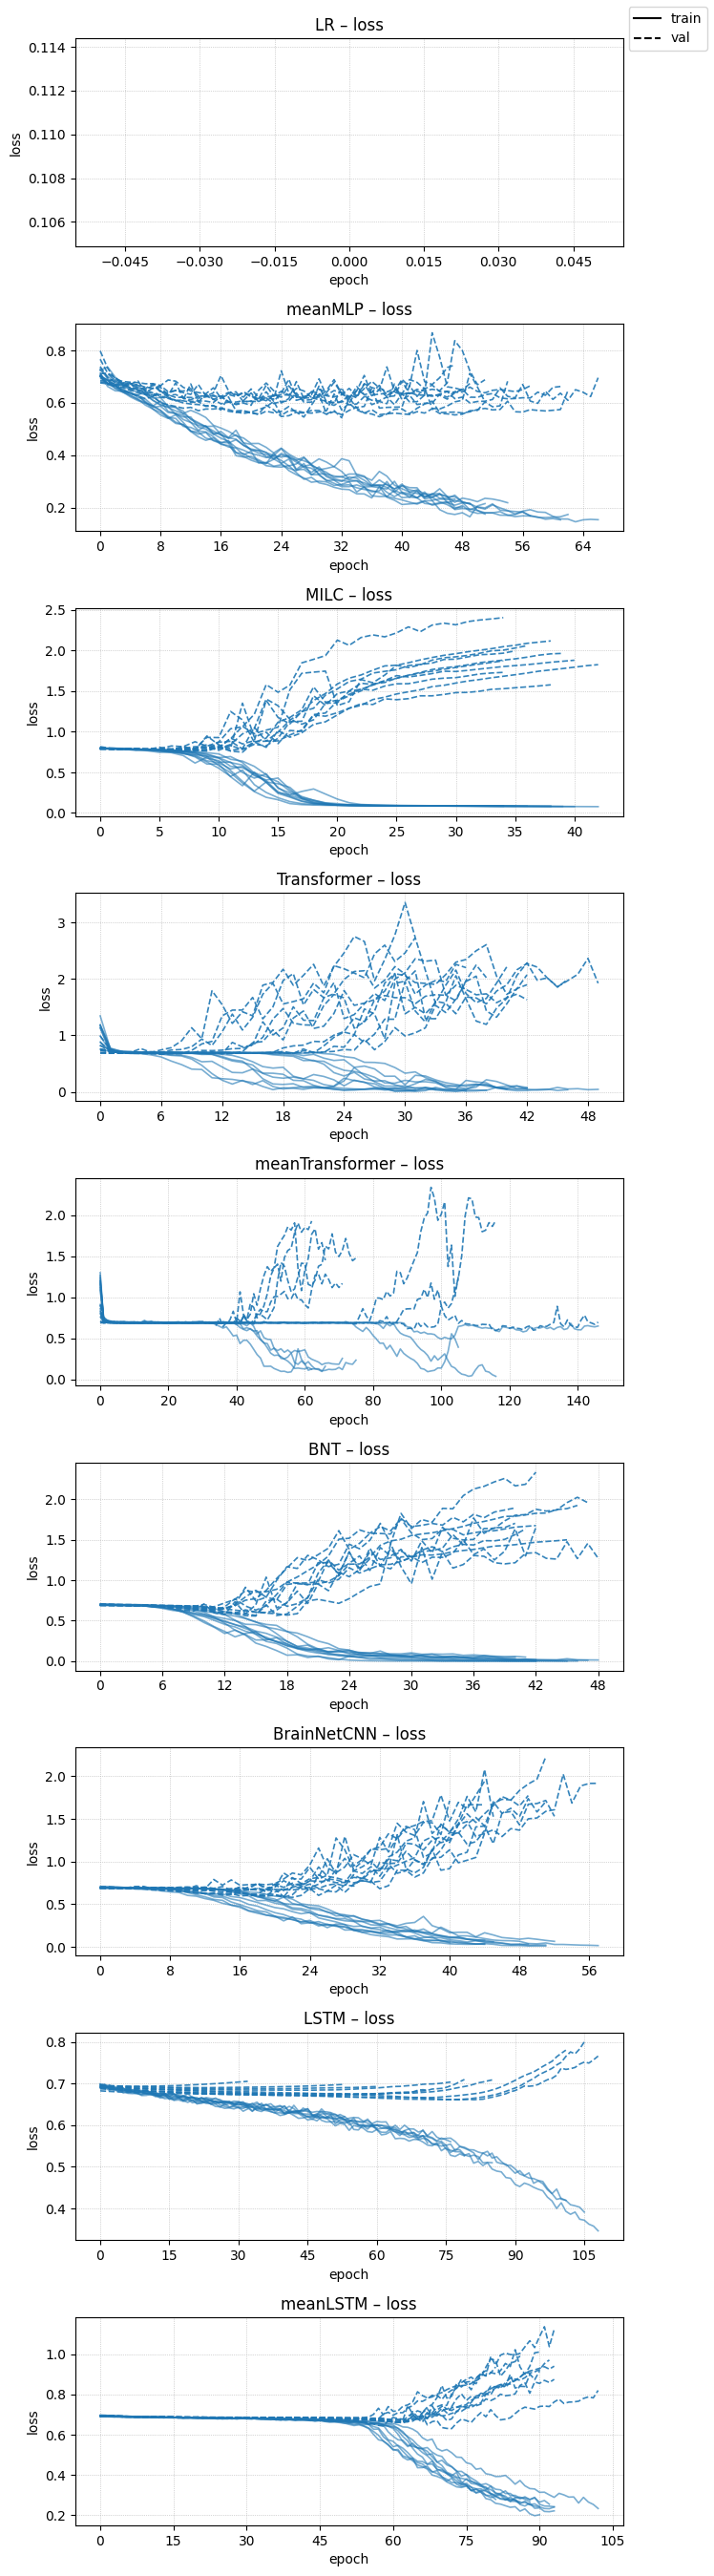

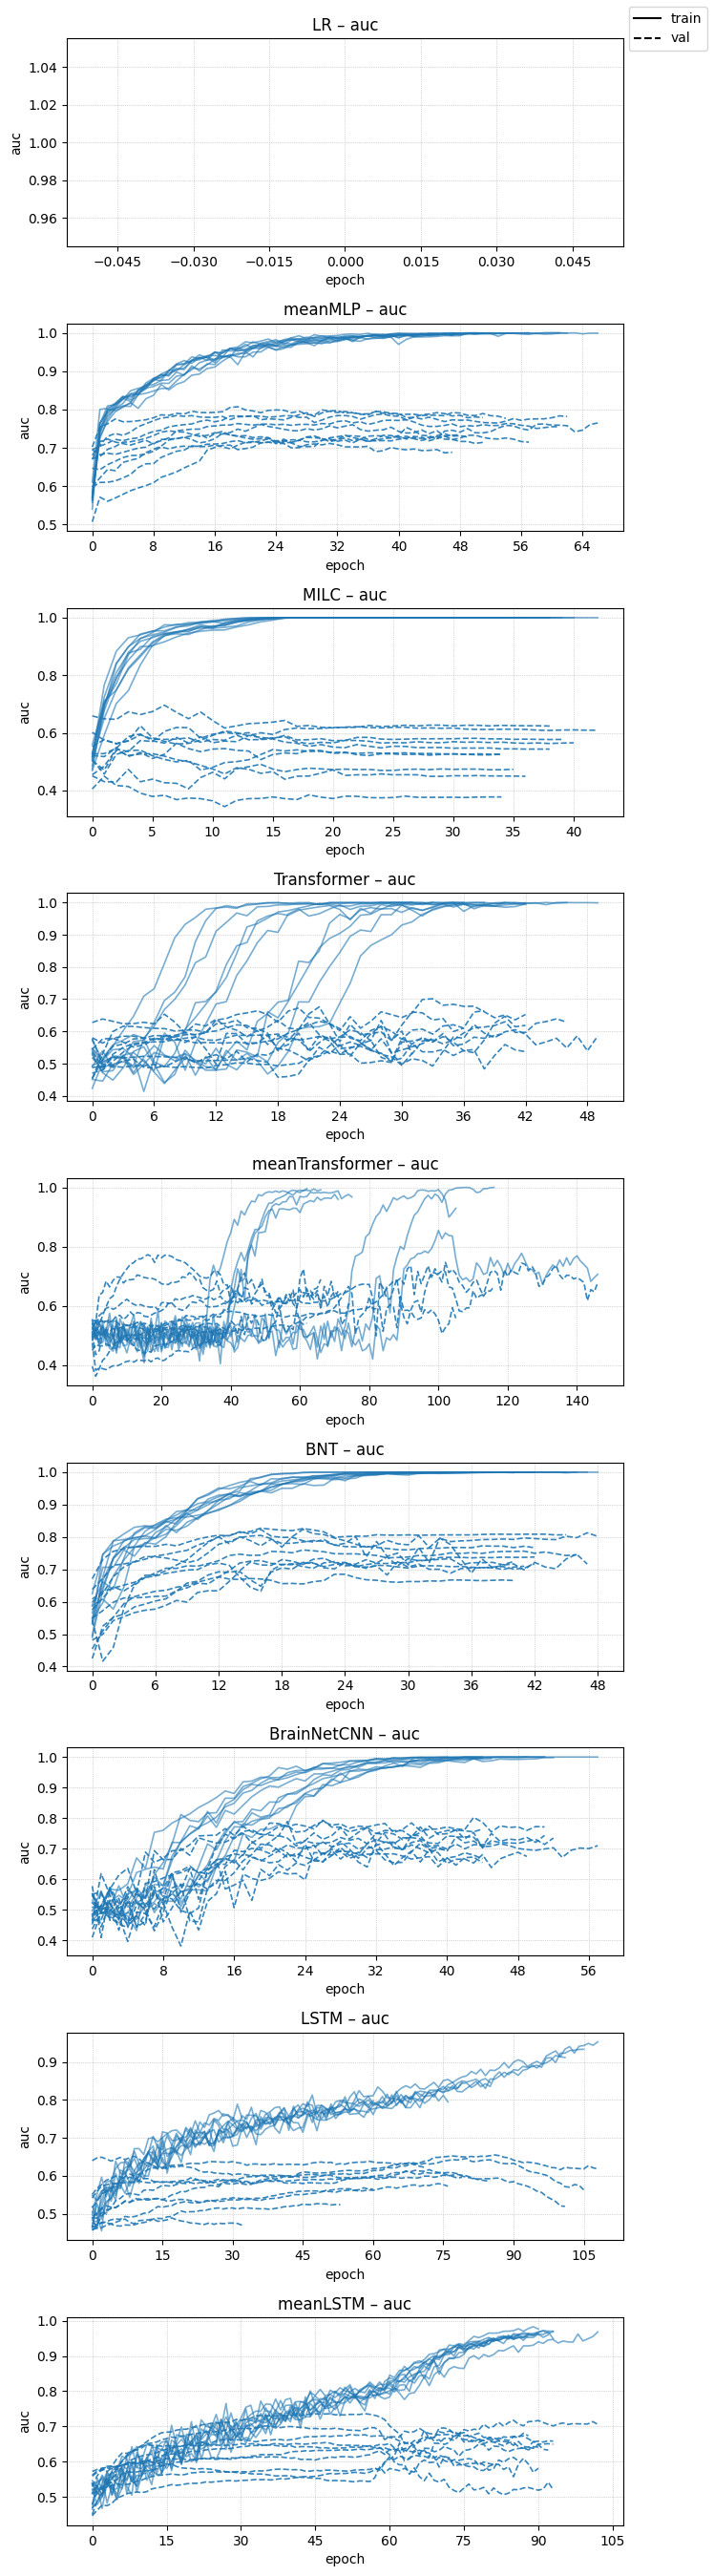

(None, None)

In [57]:
ml4fmri = fresh_import_ml4fmri()
from ml4fmri import Report # runs CV experiments with implemented models on the given data
report = Report(train_df, test_df, meta)
report.plot_training_curves()